# Naive Bayes/KNN Project

### By Nicholas Fullerton

## Introduction

This Project will take a dive into Naive Bayes algorithm with K Fold Cross Validation and KNN with K Fold Cross Validation.


## Goal

The goal of this project is to evaluate four models, and find the best model that will best classify our data.

The Models

1. Naive Bayes Classifier where we bin the continous data in our features and run CategoricalNB 
1. Naive Bayes Classifier using only the categorical features and running BernoulliNB 
1. Naive Bayes Classifier using only the continuous data and running GaussianNB 
1. KNN Model 

## Import Data

Now lets import our data and our necessary libraries and take at our data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
df.shape

(5001, 8)

## The Data

Each row of our data contains 7 feature columns about a persons face. These columns are shown above as whether the person has long hair, their forehead width and height in cm, if they have a wide nose, if they have a long nose, if their lips are thin, and if the distnance between their nose and lip is long. So we will consider these columns are features.

Finally our label is whether this person, given the features, is male or female.

To create a model that does this, we will need a classification algorithm, which KNN and Naive Bayes will do just fine.

## Clean The Data

We will clean the data by first transforming our label column so that Male = 1 and Female = 0.
Then we will clean by eliminating any rows with NA in them.

In [4]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [5]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

## Data Visualization

We will now show our data plotted with each plot representing a feature vs label.

### Long Hair per Gender

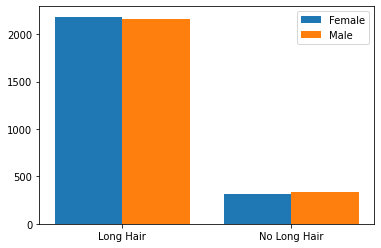

In [6]:
hair_df = df.value_counts(['long_hair', 'gender']).reset_index()
X_axis = np.arange(2)

plt.bar(X_axis - 0.2, [hair_df.iloc[0,-1], hair_df.iloc[3,-1]], 0.4, label = "Female")
plt.bar(X_axis + 0.2, [hair_df.iloc[1,-1], hair_df.iloc[2,-1]], 0.4, label = "Male")
plt.xticks(X_axis, ['Long Hair', 'No Long Hair'])
plt.legend()
plt.show()


### Nose is Wide per Gender

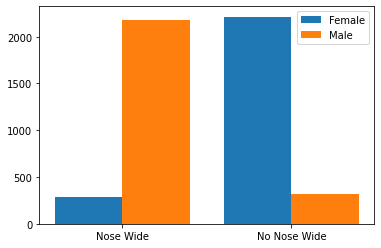

In [7]:
nose_wide_df = df.value_counts(['nose_wide', 'gender']).reset_index()
plt.bar(X_axis - 0.2, [nose_wide_df.iloc[3,-1], nose_wide_df.iloc[0,-1]], 0.4, label = "Female")
plt.bar(X_axis + 0.2, [nose_wide_df.iloc[1,-1], nose_wide_df.iloc[2,-1]], 0.4, label = "Male")
plt.xticks(X_axis, ['Nose Wide', 'No Nose Wide'])
plt.legend()
plt.show()

### Nose is Long per Gender

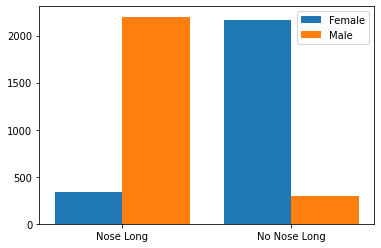

In [8]:
nose_long_df = df.value_counts(['nose_long', 'gender']).reset_index()
plt.bar(X_axis - 0.2, [nose_long_df.iloc[2,-1], nose_long_df.iloc[1,-1]], 0.4, label = "Female")
plt.bar(X_axis + 0.2, [nose_long_df.iloc[0,-1], nose_long_df.iloc[3,-1]], 0.4, label = "Male")
plt.xticks(X_axis, ['Nose Long', 'No Nose Long'])
plt.legend()
plt.show()

### Lips are Thin per Gender

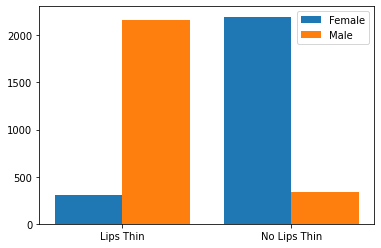

In [9]:
lips_thin_df = df.value_counts(['lips_thin', 'gender']).reset_index()
plt.bar(X_axis - 0.2, [lips_thin_df.iloc[3,-1], lips_thin_df.iloc[0,-1]], 0.4, label = "Female")
plt.bar(X_axis + 0.2, [lips_thin_df.iloc[1,-1], lips_thin_df.iloc[2,-1]], 0.4, label = "Male")
plt.xticks(X_axis, ['Lips Thin', 'No Lips Thin'])
plt.legend()
plt.show()

### If Distance from Nose to Lip is Long per Gender

   distance_nose_to_lip_long  gender     0
0                          0       0  2197
1                          1       1  2191
2                          0       1   309
3                          1       0   304


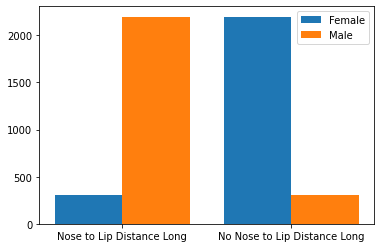

In [10]:
distance_nose_lip_df = df.value_counts(['distance_nose_to_lip_long', 'gender']).reset_index()
print(distance_nose_lip_df)
plt.bar(X_axis - 0.2, [distance_nose_lip_df.iloc[3,-1], distance_nose_lip_df.iloc[0,-1]], 0.4, label = "Female")
plt.bar(X_axis + 0.2, [distance_nose_lip_df.iloc[1,-1], distance_nose_lip_df.iloc[2,-1]], 0.4, label = "Male")
plt.xticks(X_axis, ['Nose to Lip Distance Long', 'No Nose to Lip Distance Long'])
plt.legend()
plt.show()

### Forehead Width per Gender

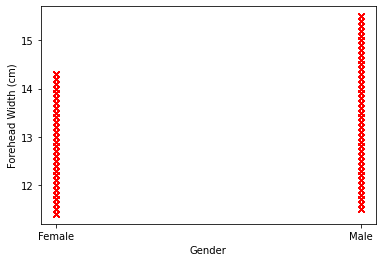

In [11]:
plt.plot(df['gender'], df['forehead_width_cm'], 'x', color='red')
plt.xticks(X_axis, ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Forehead Width (cm)')
plt.show()

### Forehead Height per Gender

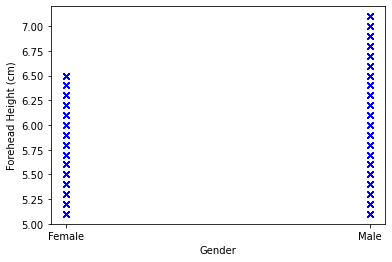

In [12]:
plt.plot(df['gender'], df['forehead_height_cm'], 'x', color='blue')
plt.xticks(X_axis, ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Forehead Height (cm)')
plt.show()

## Naive Bayes

Our data looks good to begin our first algorithm which is Naive Bayes. 

We will define a function that using K Fold Validation with Naive Bayes Classifier.
We also will take in account the type of naive bayes classifier.

In [13]:
def K_fold_nb(data, k_folds, nb_type):
    data_random = data.sample(frac=1, random_state=1234)
    subset = int(len(data_random)/k_folds)
    total_accuracy = []
    for i in range(k_folds):
        
        test_range = list(range(i*subset,(i*subset)+subset))
        test_train_index = data_random.index.isin(test_range)
        
        test = data_random[test_train_index]
        train = data_random[~test_train_index]
        
        test_x = test.iloc[:,:-1]
        test_y = test['gender']
        
        train_x = train.iloc[:,:-1]
        train_y = train['gender']
        
        if nb_type == "Cat":
            model = CategoricalNB()
        elif nb_type == "Bern":
            model = BernoulliNB()
        elif nb_type == "Gauss":
            model = GaussianNB()
        model.fit(train_x,train_y)
        
        yhat = model.predict(test_x)
        
        
        accuracy = accuracy_score(yhat, test_y)
        
        total_accuracy.append(accuracy)
        
    
    average = sum(total_accuracy)/len(total_accuracy)
    
    
    print(f"Average Accuracy Score for {k_folds} K Folds is {round(average*100,2)}%")
    
    return average
        

### First Naive Bayes Approach

For this first approach to Naive Bayes, we will be binning the continuous data and running sklearn CategoricalNB() for our model

In [14]:
enc = OrdinalEncoder()

df1 = df.copy()
df1.iloc[:,:-1] = enc.fit_transform(df1.iloc[:,:-1])
df1.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.0,4.0,10.0,1.0,0.0,1.0,1.0,1
1,0.0,26.0,3.0,0.0,0.0,1.0,0.0,0
2,0.0,4.0,12.0,1.0,1.0,1.0,1.0,1
3,0.0,30.0,10.0,0.0,1.0,1.0,1.0,1
4,1.0,21.0,8.0,0.0,0.0,0.0,0.0,0


In [15]:
avg_1 = K_fold_nb(df, 5, "Cat")
avg_2 = K_fold_nb(df, 10, "Cat")
avg_3 = K_fold_nb(df, 20, "Cat")
avg_4 = K_fold_nb(df, 50, "Cat")
avg_5 = K_fold_nb(df, 100, "Cat")
print()
print(f"Total Accuracy Score of this model is {round((avg_1+avg_2+avg_3+avg_4+avg_5)/5, 4) * 100}%")

Average Accuracy Score for 5 K Folds is 96.94%
Average Accuracy Score for 10 K Folds is 96.96%
Average Accuracy Score for 20 K Folds is 97.06%
Average Accuracy Score for 50 K Folds is 96.98%
Average Accuracy Score for 100 K Folds is 97.0%

Total Accuracy Score of this model is 96.99%


### Second Naive Bayes Approach

For this first approach to Naive Bayes, we will be using just the categorial data and running sklearn BernoulliNB() for our model


In [16]:
df2 = df.copy()
df2 = df2.drop(df2.columns[[1,2]], axis=1)
df2.head()

,long_hair,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,1,0,1,1,1
1,0,0,0,1,0,0
2,0,1,1,1,1,1
3,0,0,1,1,1,1
4,1,0,0,0,0,0


In [17]:
avg_1 = K_fold_nb(df2, 5, "Bern")
avg_2 = K_fold_nb(df2, 10, "Bern")
avg_3 = K_fold_nb(df2, 20, "Bern")
avg_4 = K_fold_nb(df2, 50, "Bern")
avg_5 = K_fold_nb(df2, 100, "Bern")

print()
print(f"Total Accuracy Score of this model is {round((avg_1+avg_2+avg_3+avg_4+avg_5)/5, 4) * 100}%")

Average Accuracy Score for 5 K Folds is 95.74%
Average Accuracy Score for 10 K Folds is 95.8%
Average Accuracy Score for 20 K Folds is 95.78%
Average Accuracy Score for 50 K Folds is 95.76%
Average Accuracy Score for 100 K Folds is 95.72%

Total Accuracy Score of this model is 95.76%


### Third Naive Bayes Approach

For this third approach to Naive Bayes, we will be using just the continuous data and running sklearn GaussianNB() for our model

In [18]:
df3 = df.copy()
df3 = df3.drop(df3.columns[[0,3,4,5,6]], axis=1)
df3.head()

,forehead_width_cm,forehead_height_cm,gender
0,11.8,6.1,1
1,14.0,5.4,0
2,11.8,6.3,1
3,14.4,6.1,1
4,13.5,5.9,0


In [19]:
avg_1 = K_fold_nb(df3, 5, "Gauss")
avg_2 = K_fold_nb(df3, 10, "Gauss")
avg_3 = K_fold_nb(df3, 20, "Gauss")
avg_4 = K_fold_nb(df3, 50, "Gauss")
avg_5 = K_fold_nb(df3, 100, "Gauss")

print()
print(f"Total Accuracy Score of this model is {round((avg_1+avg_2+avg_3+avg_4+avg_5)/5, 4) * 100}%")

Average Accuracy Score for 5 K Folds is 69.72%
Average Accuracy Score for 10 K Folds is 69.68%
Average Accuracy Score for 20 K Folds is 69.64%
Average Accuracy Score for 50 K Folds is 69.58%
Average Accuracy Score for 100 K Folds is 69.58%

Total Accuracy Score of this model is 69.64%


## KNN

We will create a similar function to Naive bayes but for KNN.
In this function we will iterate with an increasing k in combination of using K-Fold Validation, to find the best model accuracy. 

In [20]:
def K_fold_knn(data, k_folds):
    length_data = len(data)
    best_k = 0
    best_score = 0
    
    for k in range(1,length_data+1, 10):
        data_random = data.sample(frac=1, random_state=1234)
        subset = int(len(data_random)/k_folds)
        total_accuracy = []
        for i in range(k_folds):

            test_range = list(range(i*subset,(i*subset)+subset))
            test_train_index = data_random.index.isin(test_range)

            test = data_random[test_train_index]
            train = data_random[~test_train_index]

            test_x = test.iloc[:,:-1]
            test_y = test['gender']

            train_x = train.iloc[:,:-1]
            train_y = train['gender']

            
            knn_model = KNeighborsRegressor(n_neighbors=k)
            knn_model.fit(train_x, train_y)
            accuracy = knn_model.score(test_x,test_y)

            total_accuracy.append(accuracy)


        average_score = sum(total_accuracy)/len(total_accuracy)
        if average_score > best_score:
            best_k = k
            best_score = average_score
        if average_score < best_score:
            break
        


    print(f"The best model using {k_folds} K Folds was when K Nearest Neighbor was {best_k} with an accuracy score of {round(best_score*100,2)}%")
    return best_score

In [21]:
avg_1 = K_fold_knn(df, 5)
avg_2 = K_fold_knn(df, 10)
avg_3 = K_fold_knn(df, 20)
avg_4 = K_fold_knn(df, 50)
avg_5 = K_fold_knn(df, 100)

print()
print(f"Total Accuracy Score of this model is {round((avg_1+avg_2+avg_3+avg_4+avg_5)/5, 4) * 100}%")

The best model using 5 K Folds was when K Nearest Neighbor was 31 with an accuracy score of 92.24%
The best model using 10 K Folds was when K Nearest Neighbor was 31 with an accuracy score of 92.27%
The best model using 20 K Folds was when K Nearest Neighbor was 31 with an accuracy score of 92.22%
The best model using 50 K Folds was when K Nearest Neighbor was 31 with an accuracy score of 92.17%
The best model using 100 K Folds was when K Nearest Neighbor was 41 with an accuracy score of 92.12%

Total Accuracy Score of this model is 92.2%


## Conclusion

After running all of our models, we find our first model where we binned the continous data and ran CategoricalNB for our model produced the best model.

The worst model was running just the continous data using GaussianNB.

## Work Cited

The data came from - https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset